**Group Project Report: Pulsar Star Classification**
===================

# Introduction

Pulsars or Pulse Stars are highly magnetized neutron stars that radiate radio-wave emissions of two opposing narrow beams of light that are spinning, which we perceive on earth as blinking (Cofield, 2016). Each pulsar star emits a different emission pattern that varies with each of its rotations, therefore whenever there is a signal detection, or “candidate”, it is averaged over several rotations of the pulse star (Lyon, 2017). Each of these candidates are potential descriptions of a real pulse star. Radio frequency interference and noise causes is responsible for most detections, the true pulse star signals are challenging to extract (Lyon, 2017).

Our data set includes pulsar candidate data. Using this data, we will attempt to predict which of these candidates are legitimate pulsar stars and which are not. Our question is thus: Can we differentiate legitimate pulsar stars from interference and noise using a classification model?

Our Data set can be found here: https://archive.ics.uci.edu/ml/datasets/HTRU2

This data set includes 9 variables, which are as follows:

Mean of the integrated profile.
Standard deviation of the integrated profile.
Excess kurtosis of the integrated profile.
Skewness of the integrated profile.
Mean of the DM-SNR curve.
Standard deviation of the DM-SNR curve.
Excess kurtosis of the DM-SNR curve.
Skewness of the DM-SNR curve.
Class
The integrated profile variables refer to a method used to describe the radiation pulsar stars emit. Individual pulses vary in shape, and their radiation is detected as individual photons which arrive infrequently (Lyne & Graham Smith, 2012). Thus, millions of pulse periods are required to construct the integrated profile (Lyne & Graham-Smith, 2012). The timing of the pulse’s arrival also varies across different radio frequencies. The delay between frequencies is known as dispersion (Krishnan, 2020). DM-SNR, or Dispersion Measure - Signal to noise ratio curves are created to adjust for the effect of these frequency delays (Krishnan, 2020). The variables 1-8 in this dataset thus describe the mean, skewness, standard deviation, and excess kurtosis of the integrated profile and DM-SNR curves. The Class variable refers to whether or not an observation is a pulsar star or not. If Class = 0, the observation is not a pulsar star, while if Class = 1, the observation is a pulsar star.

# Preliminary Exploratory Data Analysis

In [1]:
## install packages
#install.packages("tidyverse")
#install.packages("repr")
#install.packages("tidymodels")
#install.packages("cowplot")

In [2]:
## RUN THIS CELL BEFORE CONTINUING 
#Note: if the packages not installed, uncomment the previous cell and run it
## load packages
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [3]:
## LOADING DATA FROM THE WEB##

#link to the zip file we want to download
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00372/HTRU2.zip"

#Create temporary file to store zip file and download zip file
temp <- tempfile()
download.file(url, temp)

#read dataset (HTRU_2.csv) from zip file (temp) + give each column appropriate name
pulsar_data <- read_csv(unz(temp, "HTRU_2.csv"), col_names = c("Mean IP", 
                                                         "Standard deviation IP", 
                                                         "Excess kurtosis IP", 
                                                         "Skewness IP",
                                                         "Mean DM-SNR curve",
                                                         "Standard deviation DM-SNR curve",
                                                         "Excess kurtosis DM-SNR curve",
                                                         "Skewness DM-SNR curve",
                                                         "Class"))
#Note: IP = Integrated Profile

#delete temporary file (because no longer needed)
unlink(temp)

#display the first 6 rows of our dataset
head(pulsar_data)

Rows: 17898 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Mean IP, Standard deviation IP, Excess kurtosis IP, Skewness IP, Me...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Mean IP,Standard deviation IP,Excess kurtosis IP,Skewness IP,Mean DM-SNR curve,Standard deviation DM-SNR curve,Excess kurtosis DM-SNR curve,Skewness DM-SNR curve,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
140.56250,55.68378,-0.23457141,-0.6996484,3.199833,19.11043,7.975532,74.24222,0
102.50781,58.88243,0.46531815,-0.5150879,1.677258,14.86015,10.576487,127.39358,0
103.01562,39.34165,0.32332837,1.0511644,3.121237,21.74467,7.735822,63.17191,0
136.75000,57.17845,-0.06841464,-0.6362384,3.642977,20.95928,6.896499,53.59366,0
88.72656,40.67223,0.60086608,1.1234917,1.178930,11.46872,14.269573,252.56731,0
93.57031,46.69811,0.53190485,0.4167211,1.636288,14.54507,10.621748,131.39400,0


In [4]:
## CLEANING & WRANGLING DATA INTO A TIDY FORMAT ##

# make the class column (that determines whether an observation is a pulsar or not) as a factor
pulsar_data <- pulsar_data |> 
        mutate(Class = as_factor(Class))

#replace spaces in column names by dots
colnames(pulsar_data) = make.names(colnames(pulsar_data))

#display the first 6 rows of our now tidy dataset
head(pulsar_data)

Mean.IP,Standard.deviation.IP,Excess.kurtosis.IP,Skewness.IP,Mean.DM.SNR.curve,Standard.deviation.DM.SNR.curve,Excess.kurtosis.DM.SNR.curve,Skewness.DM.SNR.curve,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
140.56250,55.68378,-0.23457141,-0.6996484,3.199833,19.11043,7.975532,74.24222,0
102.50781,58.88243,0.46531815,-0.5150879,1.677258,14.86015,10.576487,127.39358,0
103.01562,39.34165,0.32332837,1.0511644,3.121237,21.74467,7.735822,63.17191,0
136.75000,57.17845,-0.06841464,-0.6362384,3.642977,20.95928,6.896499,53.59366,0
88.72656,40.67223,0.60086608,1.1234917,1.178930,11.46872,14.269573,252.56731,0
93.57031,46.69811,0.53190485,0.4167211,1.636288,14.54507,10.621748,131.39400,0


In [5]:
## EXPLORATORY DATA ANALYSIS ##

#DO NOT CHANGE THIS (this seed value will makes our results reproductible)
set.seed(1)

# splitting data into training and testing data
pulsar_split <- initial_split(pulsar_data, prop = .75, strata = Class)
pulsar_train <- training(pulsar_split)
pulsar_test <- testing(pulsar_split)

## Summarize training data: 

# 1. number of observations in each class type
pulsar_train_summary <- pulsar_train |> 
  group_by(Class) |> 
  summarize( n = n())

pulsar_train_summary

Class,n
<fct>,<int>
0,12200
1,1223


In [6]:
# 2. means of the predictor variables
pulsar_predictor_means <- pulsar_train |> 
  select(-Class) |> 
  summarize(across(everything(), mean))

pulsar_predictor_means

Mean.IP,Standard.deviation.IP,Excess.kurtosis.IP,Skewness.IP,Mean.DM.SNR.curve,Standard.deviation.DM.SNR.curve,Excess.kurtosis.DM.SNR.curve,Skewness.DM.SNR.curve
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
111.1363,46.56378,0.4749385,1.757917,12.47593,26.29282,8.305187,104.6209


In [7]:
# 3. number of rows with missing data

pulsar_missing_data <- pulsar_train |> 
    filter_at(pulsar_train |> colnames() |> all_of() |> vars(), any_vars(is.na(.)))

number_of_rows_missing <- nrow(pulsar_missing_data)
number_of_rows_missing  # there are no missing data in this dataset

[1] 0

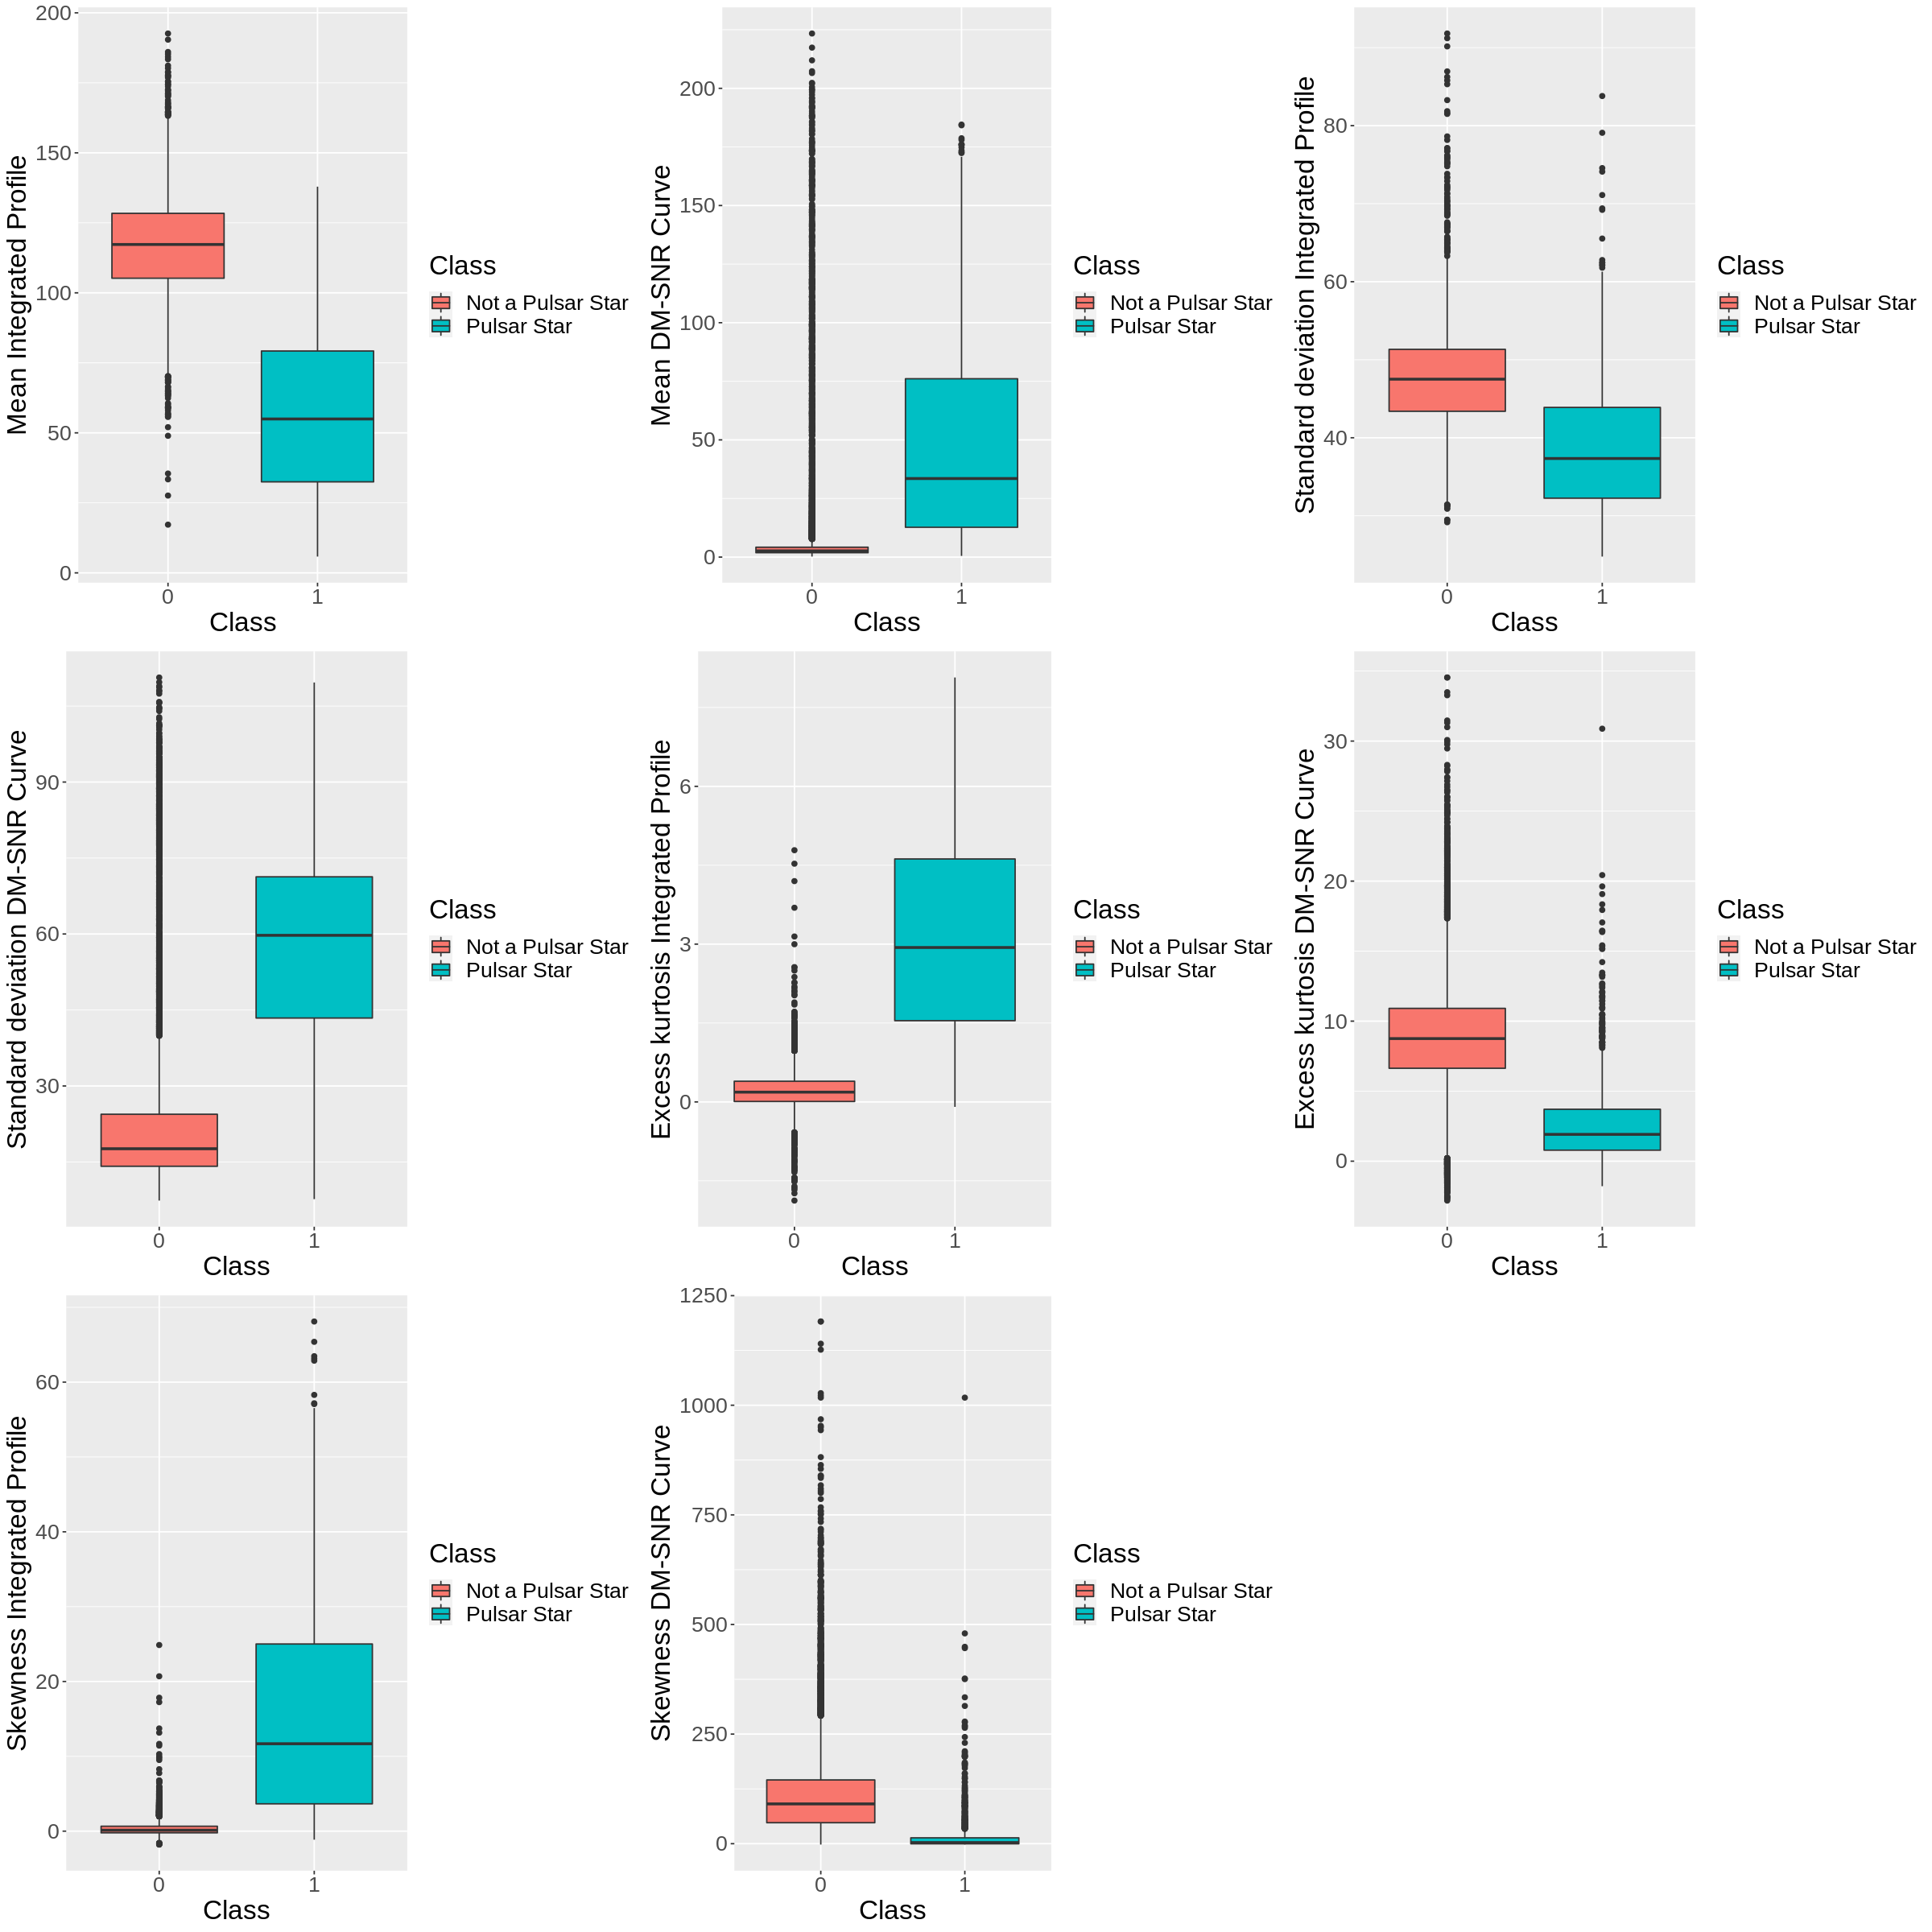

In [8]:
## EXPLORATORY DATA ANALYSIS: VISUALIZATIONS ##

# these boxplots show the distribution of observations for each variable and how that relates to the Class of the observation
pulsar_boxplot_IPmean <- pulsar_train |> 
      ggplot(aes(x = Mean.IP, y = Class, fill = Class))+
      geom_boxplot()+
      labs( x = "Mean Integrated Profile" ,
            y =  "Class") + 
      coord_flip()+ 
      scale_fill_discrete(labels = c( "Not a Pulsar Star", "Pulsar Star"))+
      theme(text = element_text(size = 20))

pulsar_boxplot_DMSNRmean <- pulsar_train |> 
      ggplot(aes(x = Mean.DM.SNR.curve, y = Class, fill = Class))+
      geom_boxplot()+
      labs( x = "Mean DM-SNR Curve" ,
            y =  "Class") + 
      coord_flip()+ 
      scale_fill_discrete(labels = c( "Not a Pulsar Star", "Pulsar Star"))+
      theme(text = element_text(size = 20))

pulsar_boxplot_SDIP <- pulsar_train |> 
      ggplot(aes(x = Standard.deviation.IP, y = Class, fill = Class))+
      geom_boxplot()+
      labs( x = "Standard deviation Integrated Profile" ,
            y =  "Class") + 
      coord_flip()+ 
      scale_fill_discrete(labels = c( "Not a Pulsar Star", "Pulsar Star"))+
      theme(text = element_text(size = 20))

pulsar_boxplot_SD_DMSNR <- pulsar_train |> 
      ggplot(aes(x = Standard.deviation.DM.SNR.curve, y = Class, fill = Class))+
      geom_boxplot()+
      labs( x = "Standard deviation DM-SNR Curve" ,
            y =  "Class") + 
      coord_flip()+ 
      scale_fill_discrete(labels = c( "Not a Pulsar Star", "Pulsar Star"))+
      theme(text = element_text(size = 20))

pulsar_boxplot_exkur_IP <- pulsar_train |> 
      ggplot(aes(x =Excess.kurtosis.IP , y = Class, fill = Class))+
      geom_boxplot()+
      labs( x = "Excess kurtosis Integrated Profile" ,
            y =  "Class") + 
      coord_flip()+ 
      scale_fill_discrete(labels = c( "Not a Pulsar Star", "Pulsar Star"))+
      theme(text = element_text(size = 20))

pulsar_boxplot_exkur_DMSNR <- pulsar_train |> 
      ggplot(aes(x = Excess.kurtosis.DM.SNR.curve , y = Class, fill = Class))+
      geom_boxplot()+
      labs( x = "Excess kurtosis DM-SNR Curve" ,
            y =  "Class") + 
      coord_flip()+ 
      scale_fill_discrete(labels = c( "Not a Pulsar Star", "Pulsar Star"))+
      theme(text = element_text(size = 20))

pulsar_boxplot_skew_IP <- pulsar_train |> 
      ggplot(aes(x = Skewness.IP, y = Class, fill = Class))+
      geom_boxplot()+
      labs( x = "Skewness Integrated Profile" ,
            y =  "Class") + 
      coord_flip()+ 
      scale_fill_discrete(labels = c( "Not a Pulsar Star", "Pulsar Star"))+
      theme(text = element_text(size = 20))

pulsar_boxplot_skew_DMSNR <- pulsar_train |> 
      ggplot(aes(x = Skewness.DM.SNR.curve, y = Class, fill = Class))+
      geom_boxplot()+
      labs( x = "Skewness DM-SNR Curve" ,
            y =  "Class") + 
      coord_flip()+ 
      scale_fill_discrete(labels = c( "Not a Pulsar Star", "Pulsar Star"))+
      theme(text = element_text(size = 20))

options(repr.plot.width=20, repr.plot.height=20)

plot_grid(pulsar_boxplot_IPmean, pulsar_boxplot_DMSNRmean, pulsar_boxplot_SDIP, pulsar_boxplot_SD_DMSNR,pulsar_boxplot_exkur_IP, pulsar_boxplot_exkur_DMSNR, pulsar_boxplot_skew_IP, pulsar_boxplot_skew_DMSNR )


These 8 plots compare the disributions of observations between means, standard deviation, excess kurtosis and skewness of the DM-SNR profiles and Integrated Profiles across the 2 Classes. For all 8 plots, the potential predictive variable is correlated with Class, although this relationship is weaker for the skewness of the DM-SNR and Integrated Profile variables. However, the difference in medians is most significant for the Mean Integrated Profile, Standard deviation DM-SNR Curve, Excess kurtosis Integrated Profile variables and thus these will be used as our predictive variables. Many of the variables have a large number of outliers, and smaller differences between median values, and were thus not used as predictive variables.

In [9]:
# create KNN model
knn_spec <-nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
        set_engine("kknn") |>
        set_mode("classification")

# create a recipe
recipe <-recipe(Class ~ Mean.IP+Standard.deviation.DM.SNR.curve+Excess.kurtosis.IP , data = pulsar_train)


In [10]:
# 5 fold cross-validation
vfold_train <- vfold_cv(pulsar_train, v = 5, strata = Class)

In [11]:
pulsar_fit <- workflow() |> 
    add_recipe(recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = vfold_train, grid = 10) |>
    collect_metrics()

accuracy_metrics <- pulsar_fit |>
        filter(.metric == "accuracy") |>
        filter(mean == max(mean)) |>
        

print(accuracy_metrics)


# A tibble: 1 × 7
  neighbors .metric  .estimator  mean     n std_err .config             
      <int> <chr>    <chr>      <dbl> <int>   <dbl> <chr>               
1         7 accuracy binary     0.979     5 0.00124 Preprocessor1_Model5


In [ ]:
## re-train model with k-value obtained from cross-validation

# create KNN model
knn_spec2 <-nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
        set_engine("kknn") |>
        set_mode("classification")

#fit the model 
pulsar_fit2 <- workflow() |> 
    add_recipe(recipe) |>
    add_model(knn_spec) |>
    fit(data = pulsar_train)


Warning message:
“tune samples were requested but there were 13423 rows in the data. 13418 will be used.”


In [ ]:
# evaluate model using testing data
pulsar_predictions <- predict(pulsar_fit2 , pulsar_test) |>
    bind_cols(pulsar_test) |>
    select(y, .pred_class)

head(pulsar_predictions)

# pull the accuracy metrics 
pulsar_metrics <-pulsar_predictions |>
  metrics(truth = y, estimate = .pred_class) |>
    filter(.metric == "accuracy") |>
    select(.estimate)

pulsar_metrics

# create a confusion matrix
pulsar_conf_mat <-pulsar_predictions |>
    conf_mat(truth = y , estimate = .pred_class)

pulsar_conf_mat

In [ ]:
## Visualization

# Discussion


summarize what you found

discuss whether this is what you expected to find?

discuss what impact could such findings have?

discuss what future questions could this lead to?

**References**

Cofield, C. (2016, April 22). What are pulsars? Space.com. Retrieved October 27, 2022, from https://www.space.com/32661-pulsars.html 

Lyne, A., & Graham-Smith, F. (2012). 15 Integrated pulse profiles. In Pulsar Astronomy (Cambridge Astrophysics, pp. 207-229). Cambridge: Cambridge University Press. doi:10.1017/CBO9780511844584.016

Lyon, R.J. HTRU2. DOI: 10.6084/m9.figshare.3080389.v1.

Lyon, R.J, Stappers, B.W., Cooper, S., Brooke, J.M, Knowles, J.D. (2016). Fifty Years of Pulsar Candidate Selection: From simple filters to a new principled real-time classification approach, *Monthly Notices of the Royal Astronomical Society 459* (1), 1104-1123. DOI: 10.1093/mnras/stw656

Krishnan, Sowmya. (2020, September 27). Pulsar candidate classification. Medium. https://medium.com/swlh/pulsar-candidate-classification-a1805a369e17